## eBay Used Car Sales Analysis

### Introduction
This EDA project aims to analyze a dataset of used cars from eBay Kleinanzeigen, which is a classifieds section of the German eBay website.  
  
The dataset was originally scraped and uploaded to Kaggle but is no longer available anymore. It can be found here - [Used Car Sales](https://data.world/data-society/used-cars-data)

### Outline

1) Data Cleaning  
2) Data Exploration  
- Count of Vehicle Type, Fuel Type and Brand of cars
- Distribution of Price, Odometer, Registration Year
- Checking Advertisements Posted
- Top 5 Brands with highest average selling prices
- Top 5 Brands with lowest average selling prices
- Average price of all brands for a quick comparison
- Top 5 brands for which most ads posted


<hr style="border-top: 2px solid blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
import numpy as np

import pandas as pd
pd.set_option('max_rows', 50)   
pd.set_option('max_columns', 100)
pd.set_option('precision', 2)   # round to two decimal points
pd.set_option('float_format', '{:,.2f}'.format)   # suppress scientific notation globally

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
autos = pd.read_csv('autos.csv', encoding='ISO-8859-1')

In [3]:
autos.head()
autos.shape
autos.info()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


(50000, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

### Data Cleaning

#### Renaming Columns

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
col_names= {'yearOfRegistration':'registration_year','monthOfRegistration':'registration_month','notRepairedDamage':'unrepaired_damage','dateCreated':'ad_created','dateCrawled':'date_crawled', 'offerType':'offer_type', 'vehicleType':'vehicle_type', 'powerPS':'power', 'fuelType':'fuel_type', 'nrOfPictures':'no_of_pictures', 'postalCode':'postal_code','lastSeen':'last_seen'}
autos.rename(columns=col_names, inplace=True)
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'no_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

#### Cleaning Column Values

In [6]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype(float)
autos['odometer'] = autos['odometer'].str.replace('km','').str.replace(',','').astype(float)
autos['postal_code'] = autos['postal_code'].astype(str)

#### Deleting Unused Columns

In [7]:
autos['seller'].value_counts()
autos['offer_type'].value_counts()
autos['abtest'].value_counts()
autos['gearbox'].value_counts()
autos['unrepaired_damage'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

test       25756
control    24244
Name: abtest, dtype: int64

manuell      36993
automatik    10327
Name: gearbox, dtype: int64

nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64

In [8]:
# We can delete seller and offer_type columns as they have almost all values same. 

autos.drop(['seller','offer_type'], axis=1, inplace=True)

### Data Exploration

#### Count of Vehicle Type, Fuel Type and Brand of cars

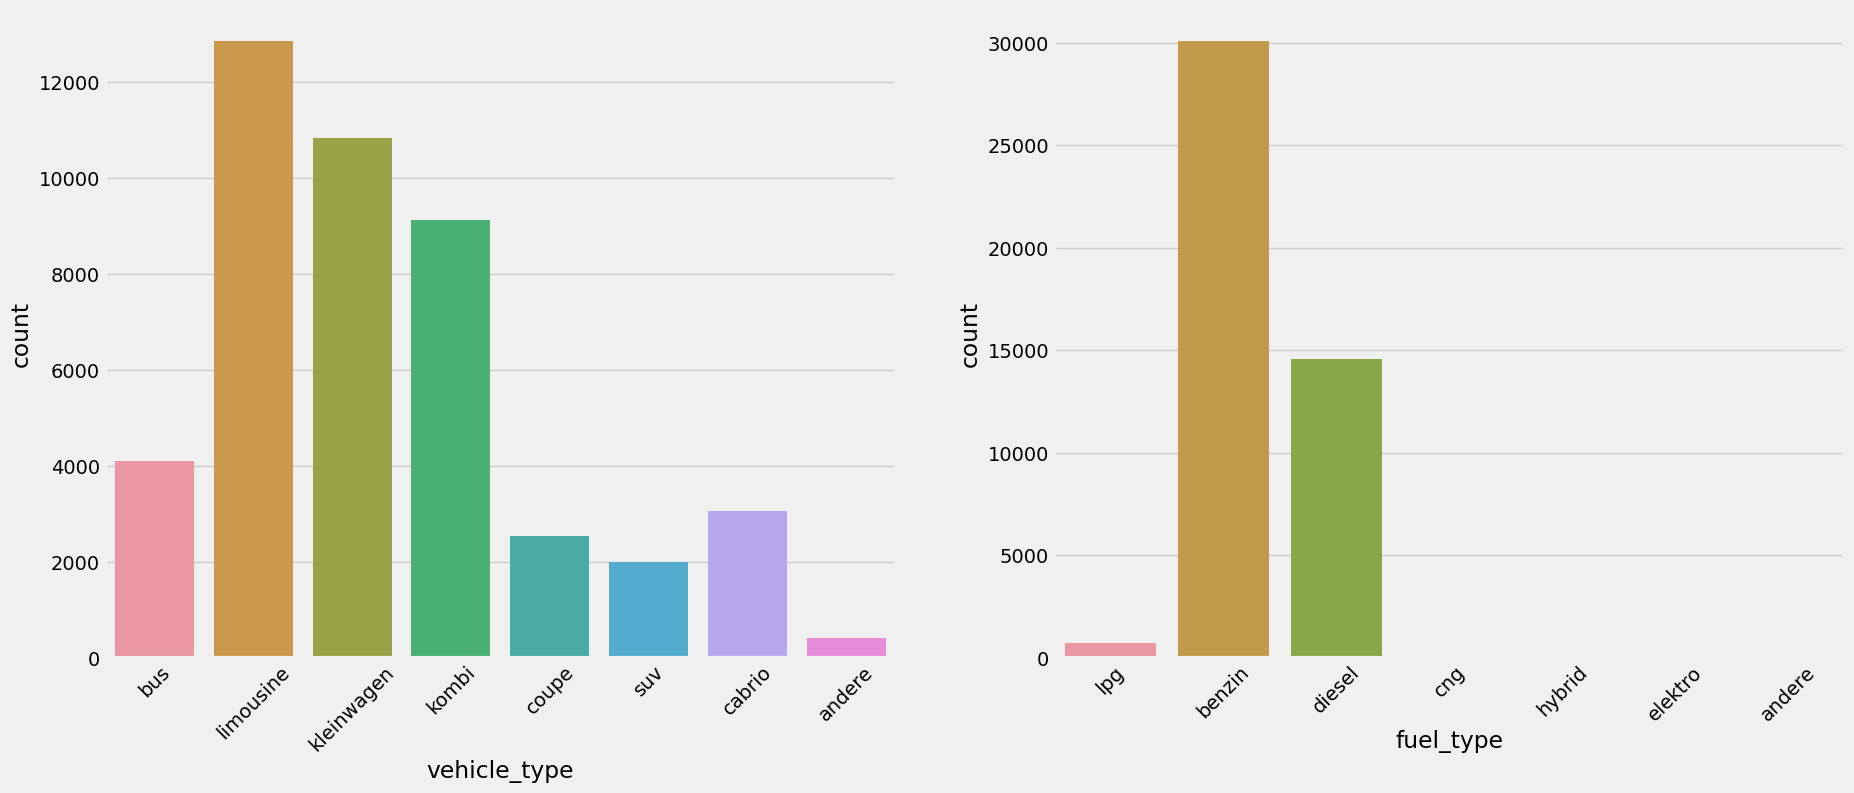

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.countplot(x='vehicle_type', data=autos)
plt.xticks(rotation=45)

plt.subplot(122)
sns.countplot(x='fuel_type', data=autos)
plt.xticks(rotation=45);

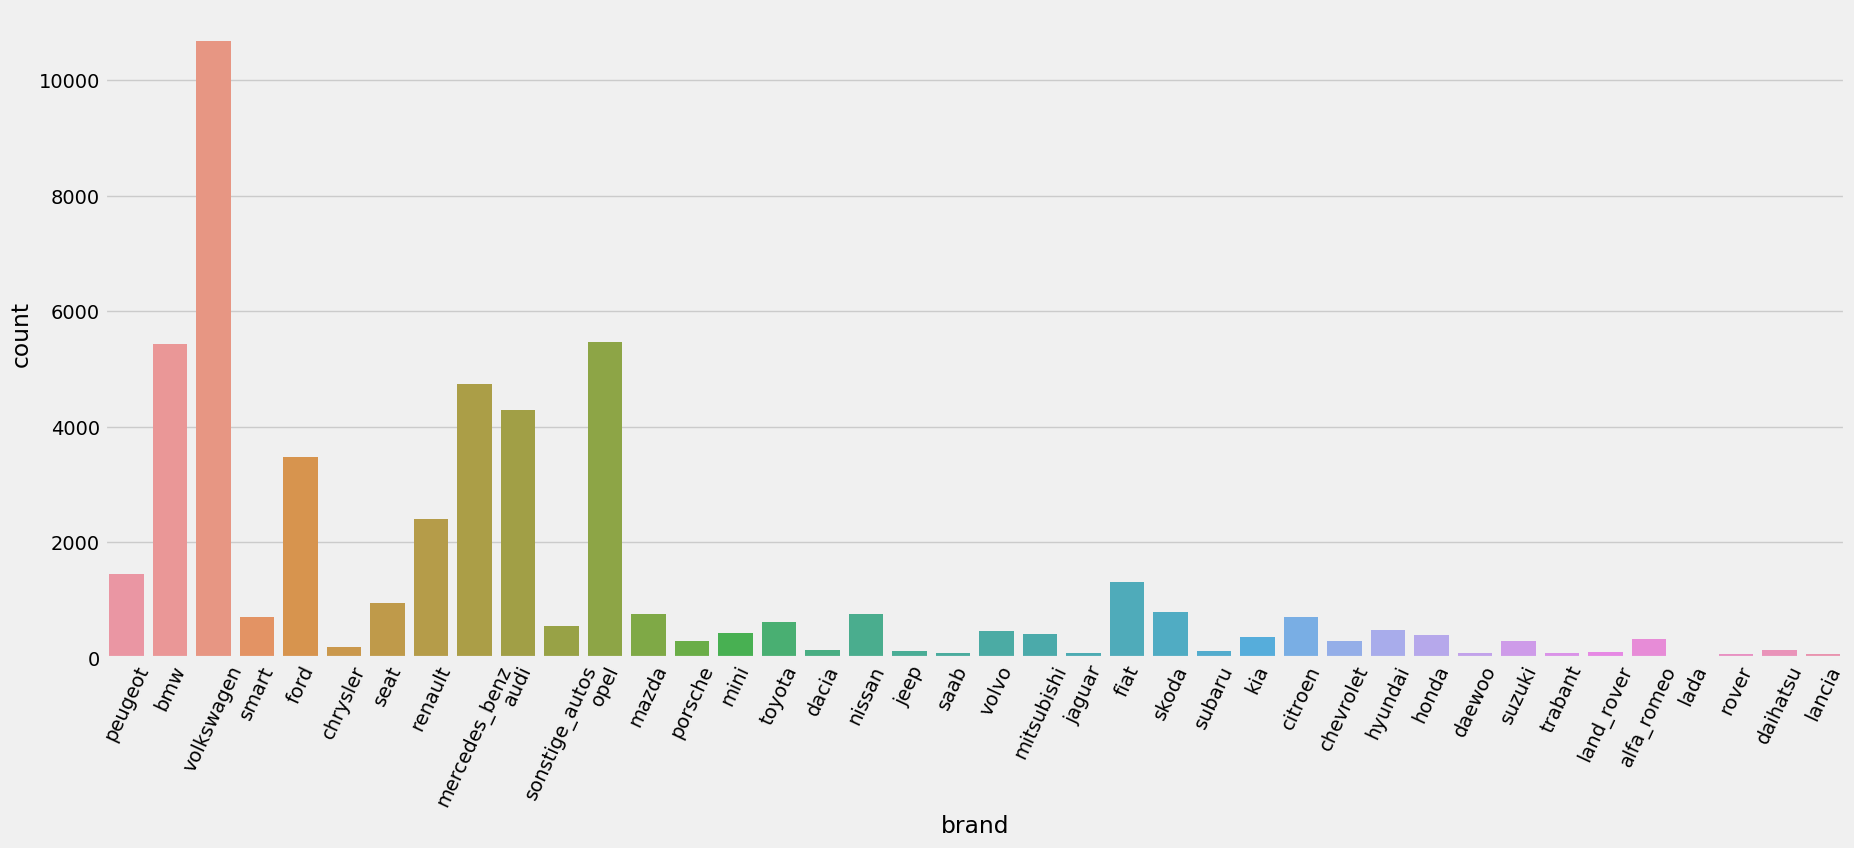

In [10]:
plt.figure(figsize=(20,8))
sns.countplot(x='brand', data=autos)
plt.xticks(rotation=65);

#### Distribution of Price, Odometer, Registration Year

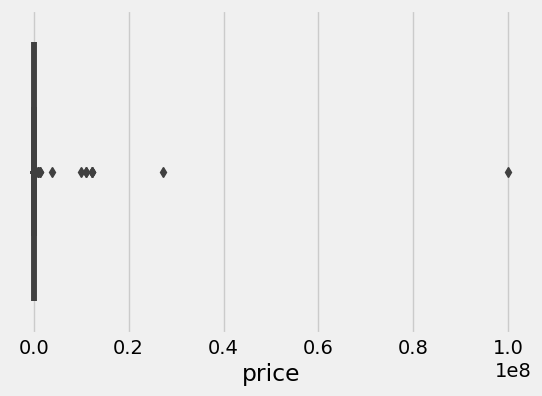

In [11]:
sns.boxplot('price', data=autos);

In [12]:
autos['price'].describe().apply(lambda x: '%.2f' % x)

count       50000.00
mean         9840.04
std        481104.38
min             0.00
25%          1100.00
50%          2950.00
75%          7200.00
max      99999999.00
Name: price, dtype: object

We see that there are quite a few otuliers, with some unrealistic low and high prices, which we should remove to understand the distribution better.

In [16]:
# Function to calculate IQR, Upper and lower limits
def col_stats(column):
    stats = column.describe()
    third_quar = stats['75%']
    first_quar = stats['25%']
    iqr = third_quar - first_quar
    upper_limit = third_quar + (1.5 * iqr)
    lower_limit = first_quar - (1.5 * iqr)
    print('IQR:',iqr,'Upper Limit:',upper_limit,'Lower Limit:',lower_limit) 

col_stats(autos['price'])

IQR: 6100.0 Upper Limit: 16350.0 Lower Limit: -8050.0


Since 25% values are already on the lower side i.e < 1100, we can take 500 as the lower limit for filtering. We will take the upper limit of 16350, to remove all the outliers in existing set

In [17]:
autos_new = autos[autos['price'].between(500,16350)]

In [18]:
autos_new.shape

(41327, 18)

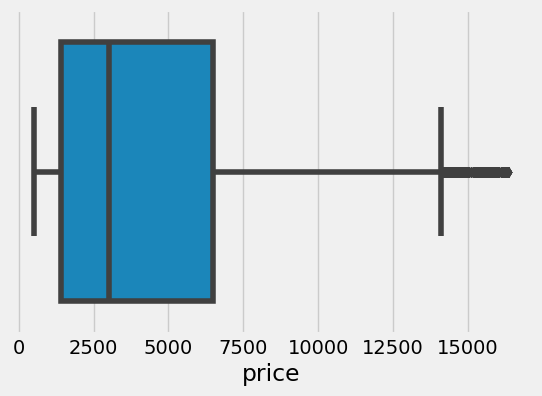

In [19]:
sns.boxplot('price', data=autos_new);

We can now see a much better distribution. Let's check the distribution of odometer as well.

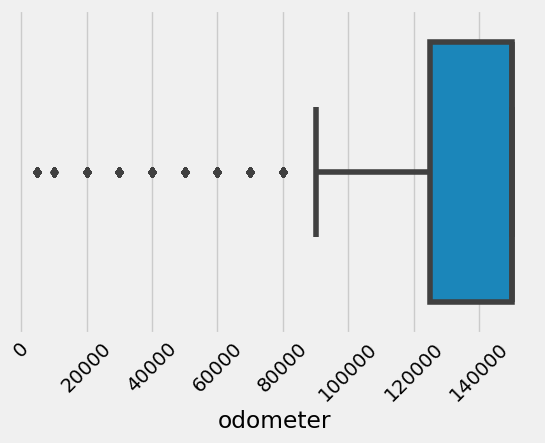

In [20]:
sns.boxplot('odometer', data=autos_new)
plt.xticks(rotation=45);

In [21]:
autos_new['odometer'].describe().apply(lambda x: '%.2f' % x)

count     41327.00
mean     129576.79
std       35942.15
min        5000.00
25%      125000.00
50%      150000.00
75%      150000.00
max      150000.00
Name: odometer, dtype: object

- We see that most of the used cars have run in the range of 125000 - 150000 kms. This might also be an indicator of why so many cars are priced less than $1000.    
  
- We do see some outliers here on the lower side as well, resulting from cars which have run less than 80000 kms, but we do not want to remove any cars because they have run less.   
  
- Also, the min of 5000 kms seems reasonable, people sell cars early to upgrade as well and not just because cars are old. We will keep these as is.

Let's now check the distribution of Registration Year as well.

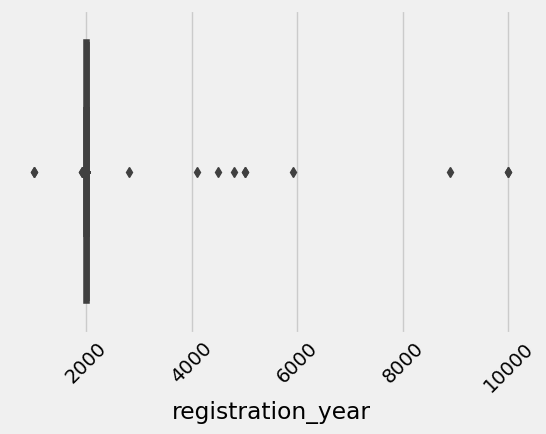

In [22]:
sns.boxplot('registration_year', data=autos_new)
plt.xticks(rotation=45);

In [ ]:
autos_new['registration_year'].describe()

So, we have some really weird values in this column like registration years greater than current year. We would need to remove these as well.  
Let's have the lower limit as 1990 and upper as 2019.

In [23]:
autos_final = autos_new[autos_new['registration_year'].between(1990,2019)]

In [24]:
autos_final.shape

(40257, 18)

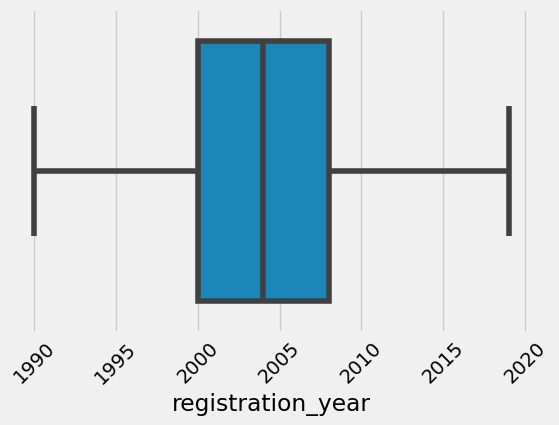

In [25]:
sns.boxplot('registration_year', data=autos_final)
plt.xticks(rotation=45);

So, now we see most of the cars were registered between 2000 and 2008, seems reasonable to sell 12-15 year old cars.

#### Checking Advertisements Posted

In [26]:
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


We don't need the timestamp, so we will separate date values and analyse

In [27]:
autos['ad_created'].str[:10].value_counts(dropna=False).sort_values(ascending=False).head()

2016-04-03    1946
2016-03-20    1893
2016-03-21    1886
2016-04-04    1844
2016-03-12    1831
Name: ad_created, dtype: int64

In [28]:
autos['last_seen'].str[:10].value_counts(dropna=False).sort_values(ascending=False).head()

2016-04-06    11050
2016-04-07     6546
2016-04-05     6214
2016-03-17     1396
2016-04-03     1268
Name: last_seen, dtype: int64

Maximum ads were created during Mar-Apr 2016 period, specifically towards end of March and early April, which then also resulted in maximum ads seen during same period.

#### Top 5 Brands with highest average selling prices

In [ ]:
auto_brands = autos_final.groupby('brand')['price'].mean().to_frame().reset_index()

In [32]:
auto_brands.sort_values('price', ascending=False)[:5]

,brand,price
26,porsche,11554.43
21,mini,8441.74
14,jeep,7110.19
18,land_rover,6397.20
1,audi,5897.91


#### Top 5 Brands with lowest average selling prices

In [33]:
auto_brands.sort_values('price', ascending=True)[:5]

,brand,price
7,daewoo,1285.61
28,rover,1375.55
8,daihatsu,1966.19
37,trabant,2089.67
17,lancia,2467.98


#### Average price of all brands for a quick comparison

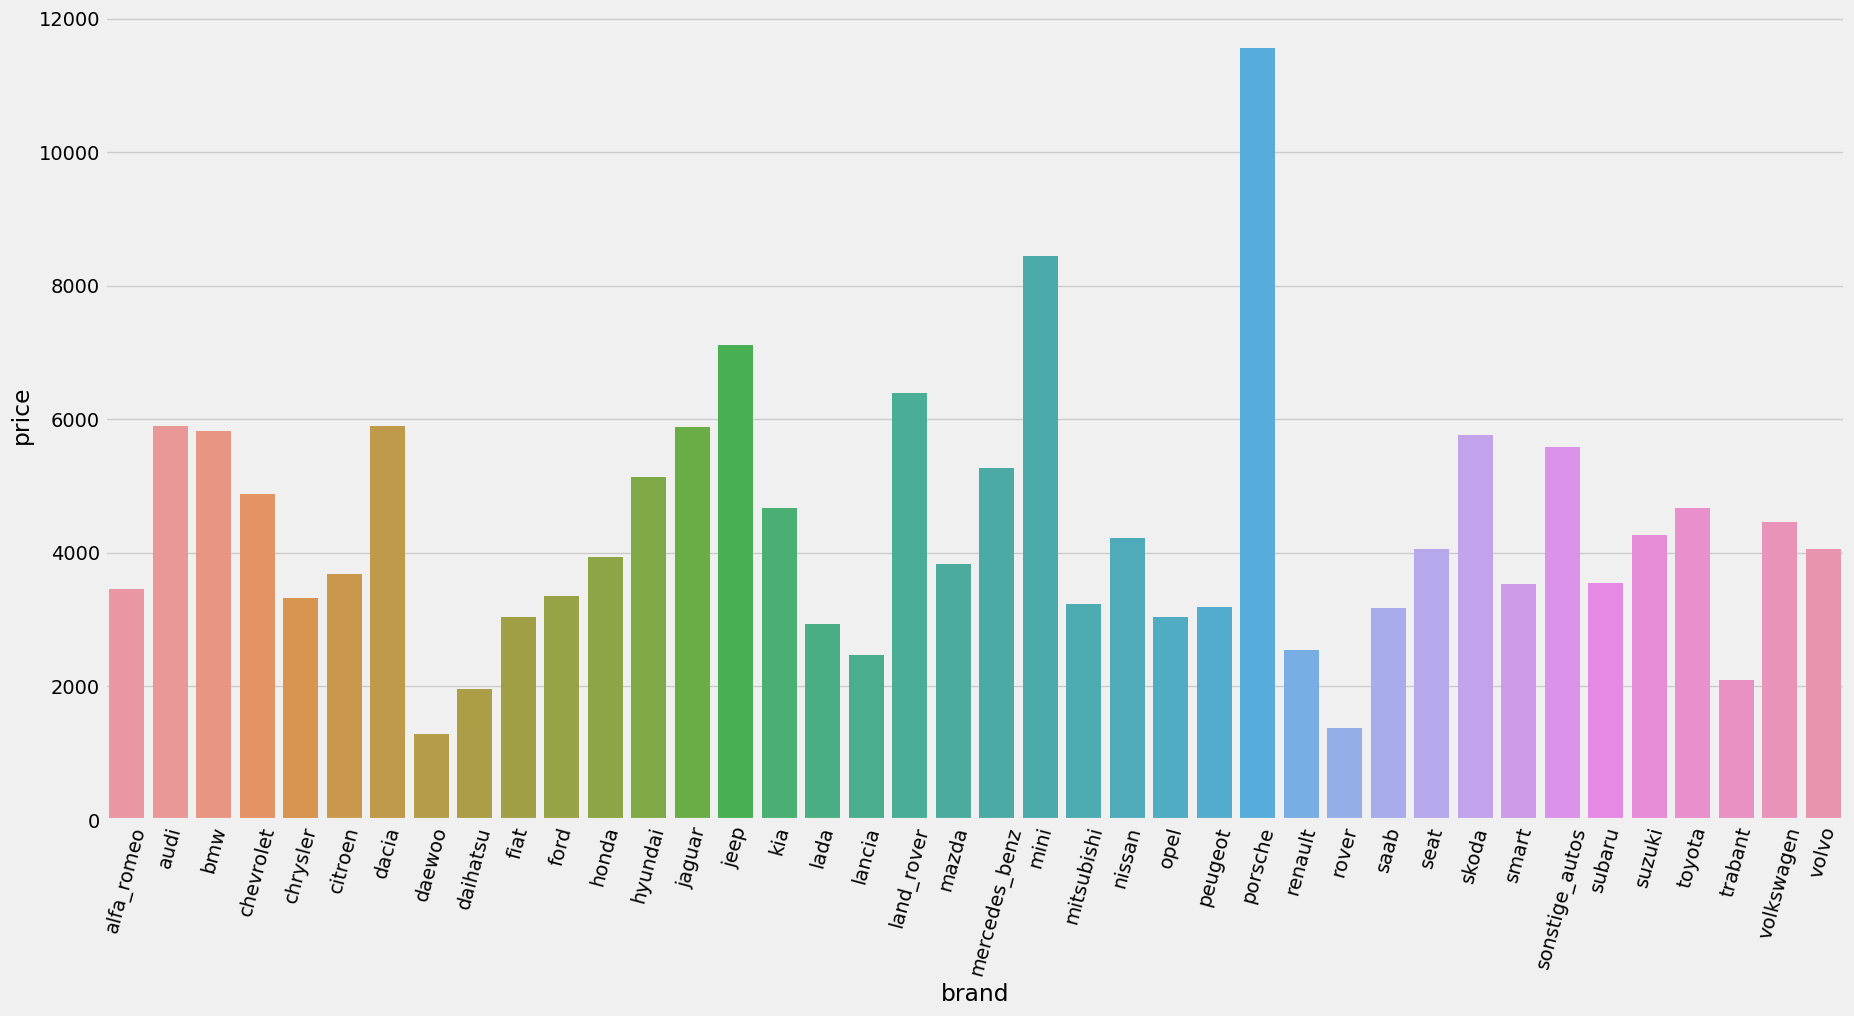

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='price', data=auto_brands)
plt.xticks(rotation=75);

#### Top 5 brands for which most ads posted

In [35]:
autos_final['brand'].value_counts().sort_values(ascending=False)[:5]

volkswagen       8729
opel             4428
bmw              4330
mercedes_benz    3642
audi             3290
Name: brand, dtype: int64